# Quiver plots based on topographic aspect 

***Disclaimer*** *: this post is not intended to teach you the maths underlying vectors but it might help you get started and signpost the way to further learing.*

The aspect of a topographic surface shows the downslope orietnation of a designated "portion" of land, for a raster, this "portion" will be each cell. The aspect value is normally provided in degrees relative to North. Plotting aspect rasters is often done by colour. For example, all cells of a raster with aspect values in say between 22.5°N – 67.5°N which can be classified as NE will be given a specific colour. This will then differ to the colour assigned to cells where values fall within the range of South West and so on. 

<img src="images/quiver/ukso_aspect.png">

Plotting these surfaces in a GIS program such as ArcMap or QGIS is a case of playing with the raster symbology. You can also then add arrows to show the aspect direction where a north facing pixel will have a north facing arrow etc. Check out the various help pages for [ArcMap](https://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/symbolizing-rasters-from-values-in-a-raster-attribute-table.htm) and [QGIS](https://docs.qgis.org/3.10/en/docs/) on how to do this.

Where you are writing your own program, this GIS solution is not always a viable method. Fortunately, Python's matplotlib can help you out here. It's called quiver plotting. Here's an example.

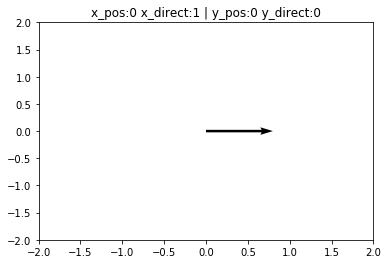

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def single_quiver(x_pos,y_pos,x_direct,y_direct, title=''):
	fig, ax = plt.subplots()
	ax.quiver(x_pos,y_pos,x_direct,y_direct, scale=5)
	ax.axis([-2,2,-2,2])
	if title !='':
		plt.title(title)
	plt.show()
    

#Aspect example: If it was 90 deg, that would be
x_pos = [0]
y_pos = [0]
x_direct = [1]
y_direct = [0]
title="x_pos:%i x_direct:%i | y_pos:%i y_direct:%i" %(x_pos[0], x_direct[0], y_pos[0], y_direct[0])
single_quiver(x_pos,y_pos,x_direct,y_direct, title=title)

Note that we are setting the origin of the arrow (`x_pos` and `y_pos`) and then the direction (`x_direct` and `y_direct`) as coordinate pairs. We'll look at how you get these from a bearing value shortly. We'll be talking about these then as ***vector magnitue and direction***.

There's something important to be aware of here. If you're thinking like a geographer and not a mathemativian, you'd probably expect an aspect of 0°N to point to 12 o-clock. However, if you were to pass that 0° to quiver in matplotlib, it will point to 3 o'clock. This is because we're dealing with degrees and not compass points. 

This is called ***standard position***.

Bearings relative to compass north and standard posiiton are 2 conventions for considering bearings or angles. 
* relative to compass north: angles are clockwise from 12 o'clock
* standard position: angles are anti-clockwise from 3 o'clock

Python's quiver function expects angles to be in ***standard position***, not relative to north, so if you are providing compass bearings, for the code to work correctly, you'll need to convert the angles. The following functionlet's you do this do this.

In [18]:
def compassBearing_to_standardPosition__degrees_counterClockwise(bearing_deg=''):
	"""Vector magnitude and direction calculations assume angle is relative to the x axis (i.e. 0 degrees is at 3 o'clock)
	Adjust compass bearings to be relative to standard poisiton
	Help: https://math.stackexchange.com/questions/492167/calculate-the-angle-of-a-vector-in-compass-360-direction
	"""
	if bearing_deg=='':
		north_bearings=[0,90,180,270,360]
		print("Converts angles from compass convention (clockwise from North) to standard position (anti-clockwise from East)")
		print(" ")
		print("Example:")
		print("Compass bearing : Standard position angle")
		for bearing in north_bearings:
			print("%i : %i" %(bearing, ((450 - bearing) % 360)))
		print("Provide a bearing to get the equivalent in standard poisiton....")
	else:
		std_pos=(450 - bearing_deg) % 360
		return(std_pos)

compassBearing_to_standardPosition__degrees_counterClockwise(bearing_deg="")

Converts angles from compass convention (clockwise from North) to standard position (anti-clockwise from East)
 
Example:
Compass bearing : Standard position angle
0 : 90
90 : 0
180 : 270
270 : 180
360 : 90
Provide a bearing to get the equivalent in standard poisiton....


So if we give it 90°N (so East on a compass), we should get 0 in standard position.

In [19]:
compassBearing_to_standardPosition__degrees_counterClockwise(bearing_deg=90)

0

Earlier, the start and end locations of the arrow or quiver were mentioned. We now need to condiser vector magnitude and direction.

In [ ]:
def calculate_U_and_V__vector_magnitude_and_direction(angle_degrees, magnitude=1, correct_to_standard_position=True):
	"""Calculates the components of a vector given in magnitude (U) and direction (V) form

	angle: Expected that angles are in standard position (i.e. relative to the x axis or where 3 o'clock is zero and not the compass bearing where 12 o'clock is 0)
	magnitude: defaults to 1
	correct_to_standard_position: if True, converts angle_degrees to standard position using formula: (450 - bearing_deg) % 360 << this should only be used if you 
		provide angle_degrees elative to grid North e.g. where 90 degrees is East etc.
	Help: https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:vectors/x9e81a4f98389efdf:component-form/v/vector-components-from-magnitude-and-direction
	"""
	if correct_to_standard_position:
		angle_degrees = compassBearing_to_standardPosition__degrees_counterClockwise(angle_degrees)
	
	angle_rad=np.deg2rad(angle_degrees)
	x = magnitude * np.cos(angle_rad) # change in x == U
	y = magnitude * np.sin(angle_rad) # change in y == V
	return(x,y)


**********************
**CHRIS: Up to line 98 of N:\Github\Chris35Wills.github.io\_drafts\aspect_quiver.py**